In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

_30k_main_palette_dict = {
    "blue": "#202F66",
    "orange": "#FF7048",
    "purple": "#8B87EA",
    "pink": "#D869AB",
    "cyan": "#54C9B9",
    "yellow": "#F3D36E",
}

_30k_danger_safe_palette_dict = {
    "danger": "#FF4F72",
    "safe": "#58EDB9",
}

_30k_text_palette_dict = {
    "text_black": "#32363A",
    "text_lighter1": "#6F7273",
    "text_lighter2": "#8B8E8F",
    "bg_cream": "#FAF7F4"
}

_font_mono = "Inconsolata"
_font_serif = "Canela"
_font_sans = "Gill Sans Nova"

plt.style.use("./utils/minus_thirty_k.mplstyle")

_30k = list(_30k_main_palette_dict.values())
sns.set_palette(_30k)

import warnings

warnings.filterwarnings('ignore')

from utils.tweets_utils import *


import lorem

import matplotlib

from matplotlib import patheffects

In [2]:
df = pd.read_csv("./data/users_lookup.csv").sort_values(by=['reply_freq'], ascending=False, ignore_index=True)
tweets_df = pd.read_csv("./data/tweets_2019-2020.csv")

In [3]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21364 entries, 0 to 21363
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tweetid                   21364 non-null  int64  
 1   userid                    21364 non-null  object 
 2   user_display_name         21364 non-null  object 
 3   user_screen_name          21364 non-null  object 
 4   user_reported_location    1386 non-null   object 
 5   user_profile_description  7781 non-null   object 
 6   user_profile_url          0 non-null      float64
 7   follower_count            21364 non-null  int64  
 8   following_count           21364 non-null  int64  
 9   account_creation_date     21364 non-null  object 
 10  account_language          21364 non-null  object 
 11  tweet_language            21364 non-null  object 
 12  tweet_text                21364 non-null  object 
 13  tweet_time                21364 non-null  object 
 14  tweet_

In [4]:
df.head(20)

,numeric_id,user_id,mention_freq,RT_freq,reply_freq
0,229313308,@armypr_news,1559,958,591
1,1214742430601187328,@army2pr,1830,1293,399
2,358491915,@1st_Army_Area,782,476,302
3,267243786,@WassanaNanuam,921,705,202
4,337604843,@weloverta,437,255,182
5,37950212,@ThaiPBS,436,253,179
6,1206467004338556929,@JuahuaHeadline,324,166,157
7,87732915,@SpringNews_TV,292,142,150
8,1040252793339240448,@prayutofficial,347,211,129
9,980807795464220672,@FWPthailand,266,35,118


In [5]:
thrs = 50

count_thrs_rp = len(df[df['reply_freq'] >= thrs])
count_thrs_rp

27

In [6]:
df.sum()

numeric_id      2293133081214742430601187328358491915267243786...
user_id         @armypr_news@army2pr@1st_Army_Area@WassanaNanu...
mention_freq                                                20024
RT_freq                                                     11199
reply_freq                                                   6947
dtype: object

In [7]:
df.head(10).sum()

numeric_id      2293133081214742430601187328358491915267243786...
user_id         @armypr_news@army2pr@1st_Army_Area@WassanaNanu...
mention_freq                                                 7194
RT_freq                                                      4494
reply_freq                                                   2409
dtype: object

In [8]:
df.head(10).sum()['reply_freq']/df.sum()['reply_freq']

0.3467683892327623

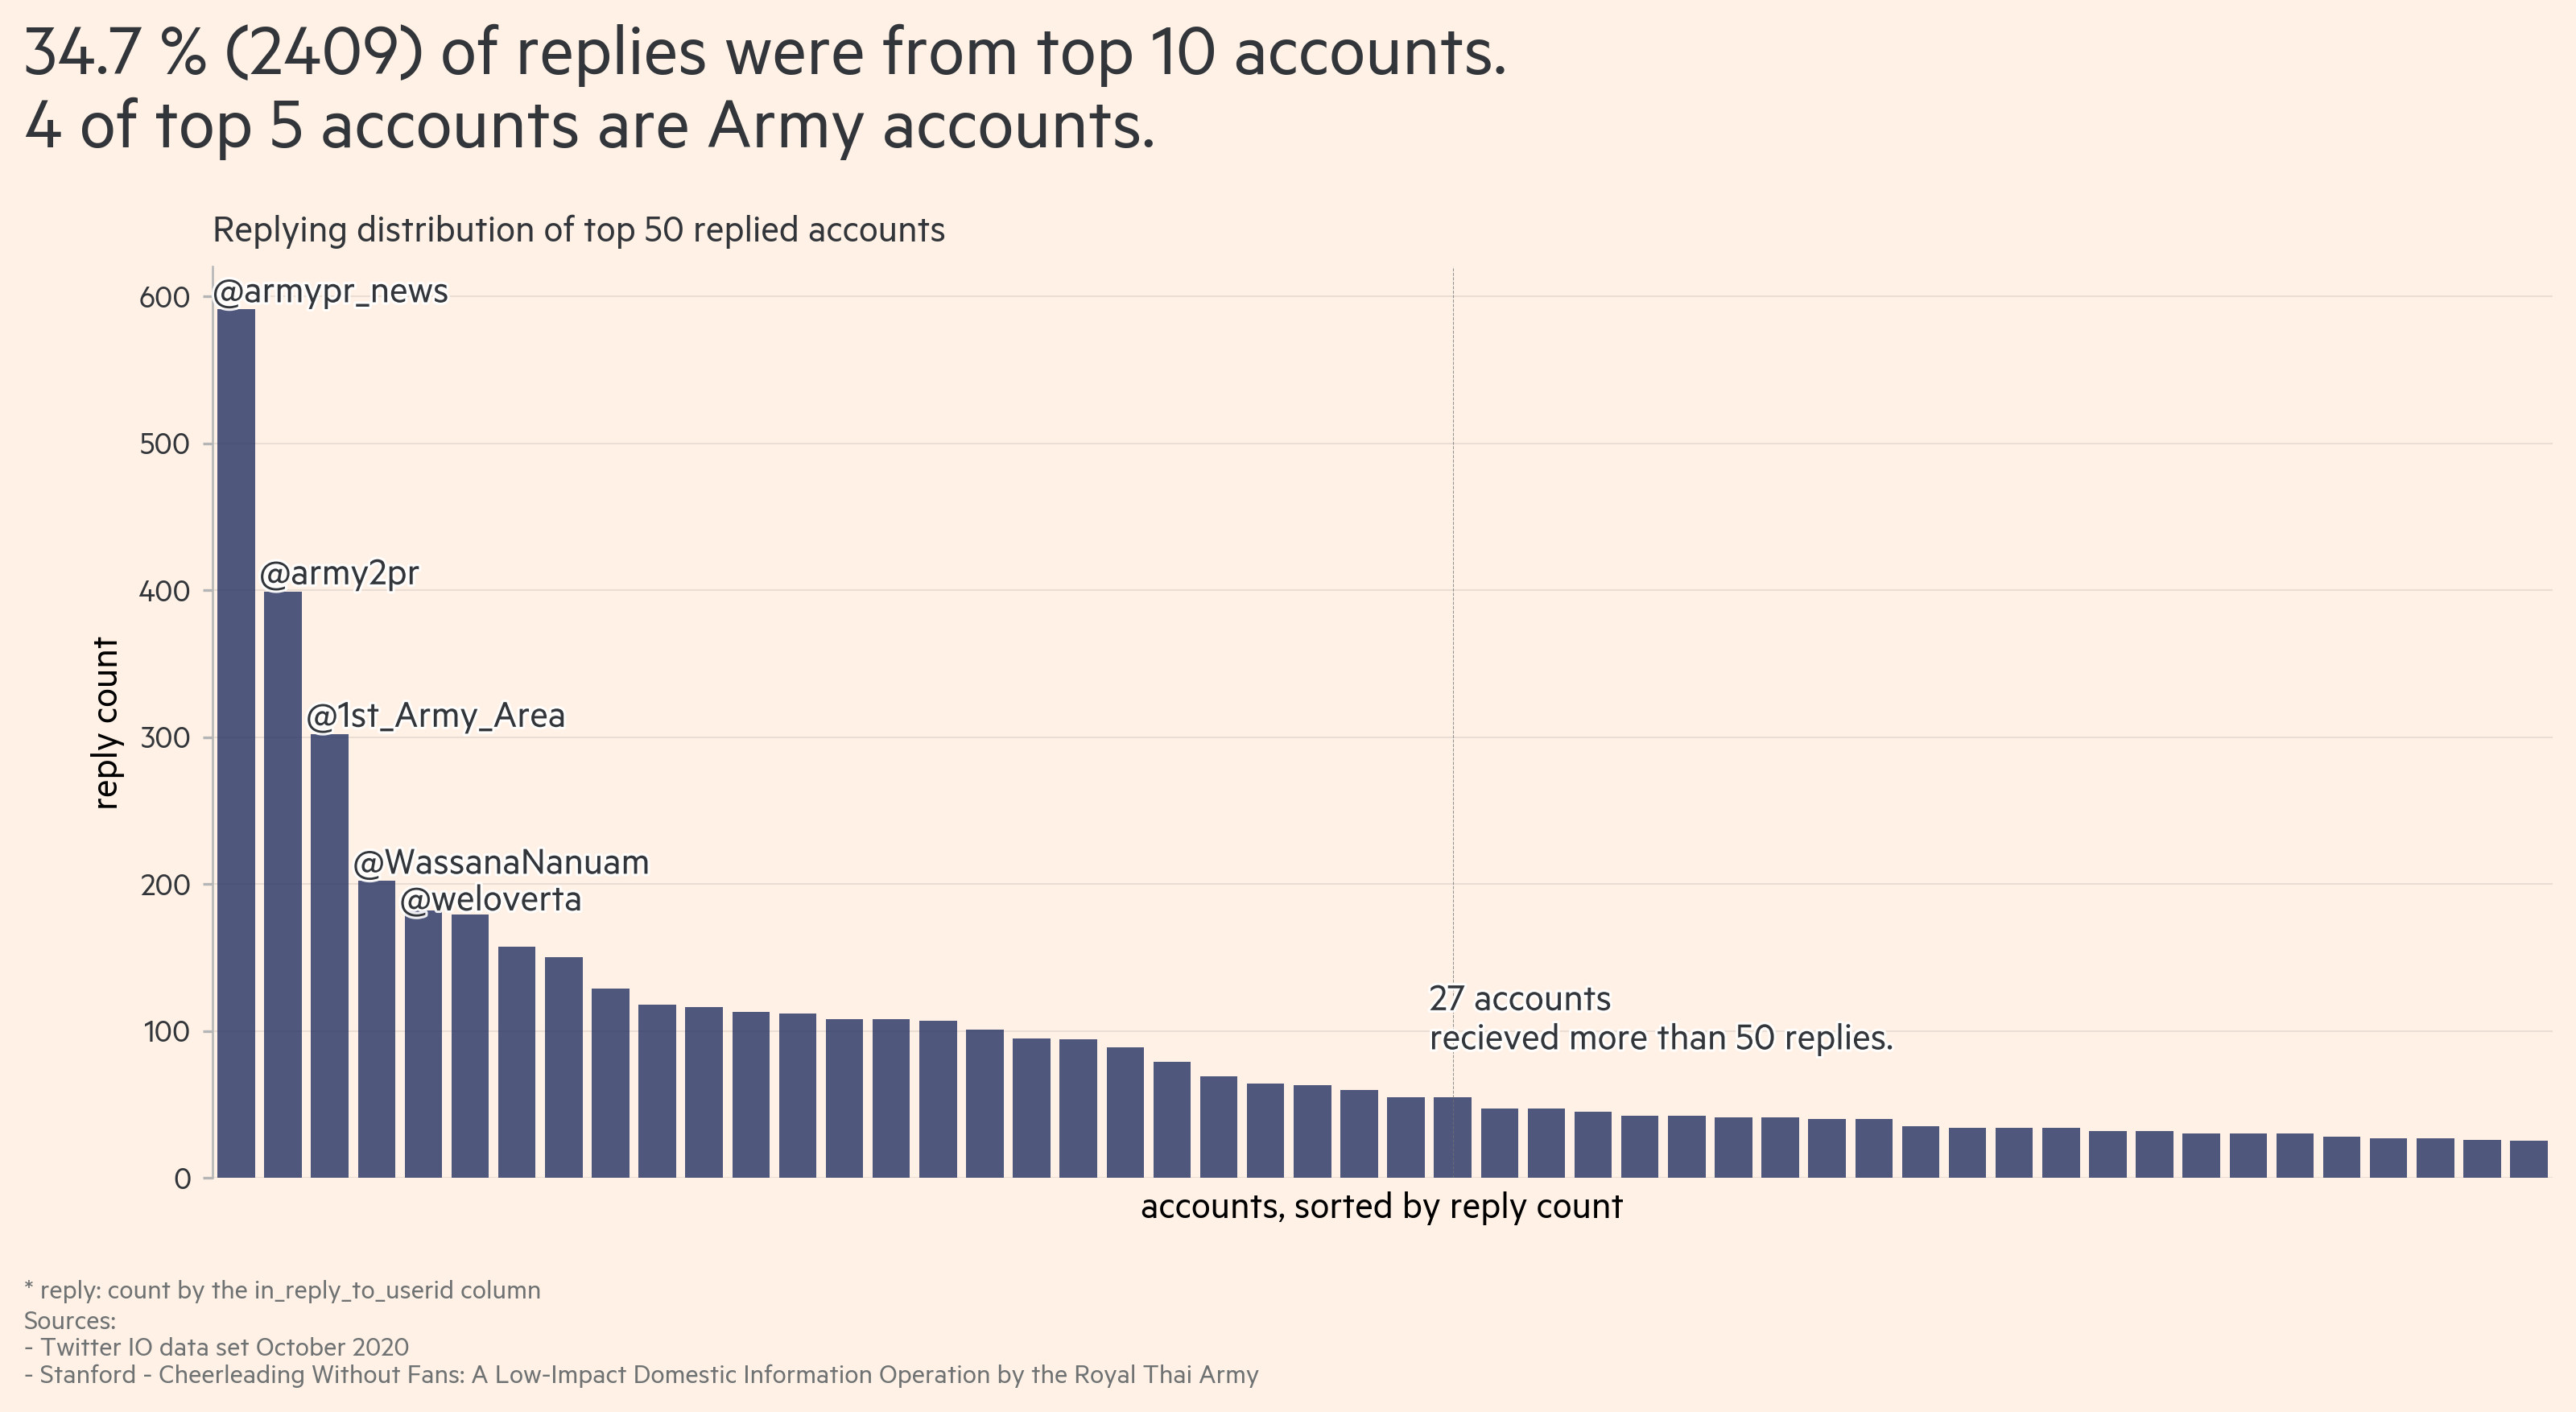

In [9]:
top = 50

fig = plt.figure(facecolor="#fff1e5")


fontfam = ["Metric", "Inconsolata"]

plt.axvline(x=count_thrs_rp-1, linewidth=0.25, alpha=0.75, 
            linestyle='--', color=_30k_text_palette_dict['text_lighter1'])

sns.barplot(df.head(top).index, df.head(top)['reply_freq'], color=_30k_main_palette_dict['blue'], 
            saturation=0.9, alpha=0.8)

# ← 
text = f"""\
{count_thrs_rp} accounts
recieved more than {thrs} replies."""
plt.text(x=count_thrs_rp-1.5, y=df.loc[count_thrs_rp-1, 'reply_freq']*1.5, 
         s=text, 
         path_effects=[patheffects.Stroke(linewidth=1.5, foreground='white', alpha=0.9),
                      patheffects.Normal()], fontfamily=fontfam,
         ha='left', va='bottom')


prev = None
for i in range(5):
    text = df.loc[i, 'user_id']
    y = df.loc[i, 'reply_freq']
    if prev != None and abs(df.loc[i, 'reply_freq'] - prev) < 50:
        y = df.loc[i, 'reply_freq'] - 5
    plt.text(x=i-0.5, y=y, 
         s=text, 
         path_effects=[patheffects.Stroke(linewidth=1.5, foreground='white', alpha=0.9),
                      patheffects.Normal()], fontfamily=fontfam,
         ha='left', va='bottom')
    
    prev = df.loc[i, 'reply_freq']

ax = plt.gca()

ax.set_facecolor("#fff1e5")

title = f"Replying distribution of top {top} replied accounts"
plt.title(title, fontfamily=fontfam)

n = 10
text = f"""\
{
np.round(df.head(n).sum()['reply_freq']/df.sum()['reply_freq']*100, 1)
} % ({df.head(n).sum()['reply_freq']}) of replies were from top {n} accounts.
4 of top 5 accounts are Army accounts."""

takeaway_title = f"{text}"
fig.suptitle(takeaway_title,
            ha="left", va="bottom",
            x=ax.get_position().x0/2, y=ax.get_position().y1*1.1,
             fontfamily=fontfam, fontsize=14*1.618
            )


footnote = "* reply: count by the in_reply_to_userid column"
plt.figtext(s=footnote, 
            x=ax.get_position().x0/2, y=ax.get_position().y0-0.1,
            fontsize=14/1.618, color=_30k_text_palette_dict['text_lighter1'],
            fontfamily=fontfam
           )

footnote = f"""\
Sources:
- Twitter IO data set October 2020
- Stanford - Cheerleading Without Fans: A Low-Impact Domestic Information Operation by the Royal Thai Army"""
plt.figtext(s=footnote, 
            x=ax.get_position().x0/2, y=ax.get_position().y0-0.17,
            fontsize=14/1.618, color=_30k_text_palette_dict['text_lighter1'],
            fontfamily=fontfam
           )

plt.xlabel('accounts, sorted by reply count', fontfamily=fontfam)
plt.ylabel("reply count", fontfamily=fontfam)
plt.xticks(ticks=[], labels=[])
plt.yticks(ticks=np.arange(0, 700, 100), fontfamily=fontfam)

sns.despine(bottom=True)

plt.show()